In [70]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [71]:
df = pd.read_csv("pima-indians-diabetes.csv", skiprows = 9, header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1)
df.columns = ['Preg',"G","BP","S","Insul","BMI","D","Age","Class"]
df.head()

,Preg,G,BP,S,Insul,BMI,D,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
# null 값 확인
df.isna().sum()

Preg     0
G        0
BP       0
S        0
Insul    0
BMI      0
D        0
Age      0
Class    0
dtype: int64

In [74]:
# feature 데이터 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns = ['Preg',"G","BP","S","Insul","BMI","D","Age","Class"])
df_std

,Preg,G,BP,S,Insul,BMI,D,Age,Class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


In [75]:
# feature와 label 설정
X = df[['Preg',"G","BP","S","Insul","BMI","D","Age"]]
y = df["Class"]
X.shape, y.shape

((768, 8), (768,))

In [76]:
# train,test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, test_size = 0.2, random_state = 2022
)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((614, 8), (614,), (154, 8), (154,))

## 1. 결정 트리와 SVM 으로 학습하고 예측을 수행한 후 각각 혼돈행렬, 정확도, 정밀도, 재현율, F1스코어를 계산하세요

In [77]:
# Decision Tree Classifier 분석
dtc = DecisionTreeClassifier(random_state = 2022)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.6948051948051948

In [78]:
# Support Verctor Machine 분석
svc = SVC(random_state = 2022)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7402597402597403

In [79]:
# 평가하지 않고 분석까지만 하기
dtc_pred = dtc.predict(X_test)
svc_pred = svc.predict(X_test)

In [80]:
print("dtc 혼돈행렬 \n",confusion_matrix(y_test, dtc_pred))
print("------------")
print("svc 혼돈행렬 \n",confusion_matrix(y_test, svc_pred))

dtc 혼돈행렬 
 [[74 26]
 [21 33]]
------------
svc 혼돈행렬 
 [[85 15]
 [25 29]]


In [81]:
# 정밀도 (precision_score TP/(FP+TP))
from sklearn.metrics import precision_score
print("dtc 정밀도: ",precision_score(y_test, dtc_pred))
print("------------------------------------")
print("svc 정밀도: ",precision_score(y_test, svc_pred))

dtc 정밀도:  0.559322033898305
------------------------------------
svc 정밀도:  0.6590909090909091


In [82]:
# 재현율(Recall TP / (FN + TP))
from sklearn.metrics import recall_score
print("dtc 재현율: ",recall_score(y_test, dtc_pred))
print("------------------------------------")
print("svc 재현율: ",recall_score(y_test, svc_pred))

dtc 재현율:  0.6111111111111112
------------------------------------
svc 재현율:  0.5370370370370371


In [83]:
# F1 Score
from sklearn.metrics import f1_score
print("dtc f1: ",f1_score(y_test, dtc_pred))
print("------------------------------------")
print("svc f1: ",f1_score(y_test, svc_pred))

dtc f1:  0.5840707964601771
------------------------------------
svc f1:  0.5918367346938775


In [84]:
# AUC Score
from sklearn.metrics import roc_auc_score
print("dtc AUC: ",roc_auc_score(y_test, dtc_pred))
print("------------------------------------")
print("svc AUC: ",roc_auc_score(y_test, svc_pred))

dtc AUC:  0.6755555555555556
------------------------------------
svc AUC:  0.6935185185185185


In [85]:
df.columns[:-1]

Index(['Preg', 'G', 'BP', 'S', 'Insul', 'BMI', 'D', 'Age'], dtype='object')

### 2. 결정 트리에서 max_depth, min_samples_split, min_samples_leaf 값을 하나씩 선택해서 tree 그림을 그려보세요

In [86]:
# tree 그림 그리기 위해 모듈 설정
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

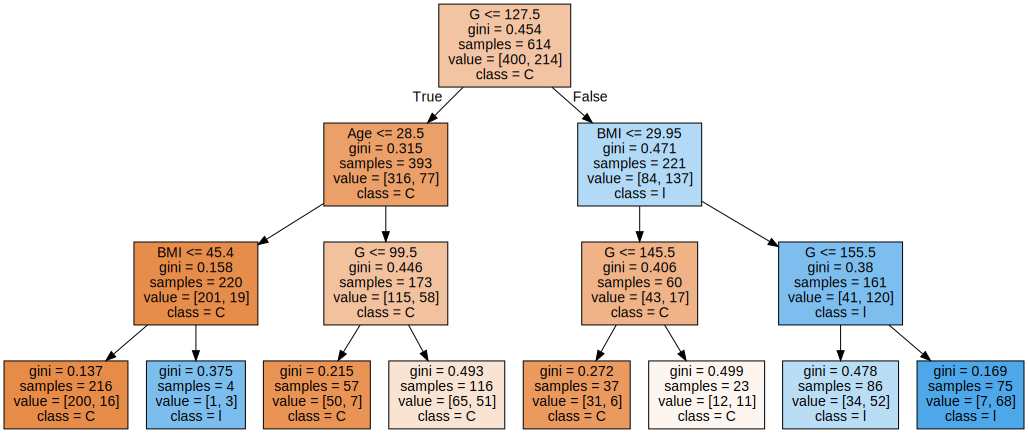

In [87]:
# max_depth = 3
dtc2 = DecisionTreeClassifier(random_state = 2022, max_depth = 3)
dtc2.fit(X_train, y_train)
export_graphviz(
    dtc2, out_file= "tree1.dot",
    feature_names = df.columns[:-1],
    class_names = df.columns[-1],
    impurity = True, filled = True
)
with open('tree1.dot') as file:
  dot_graph = file.read()
graphviz.Source(dot_graph)

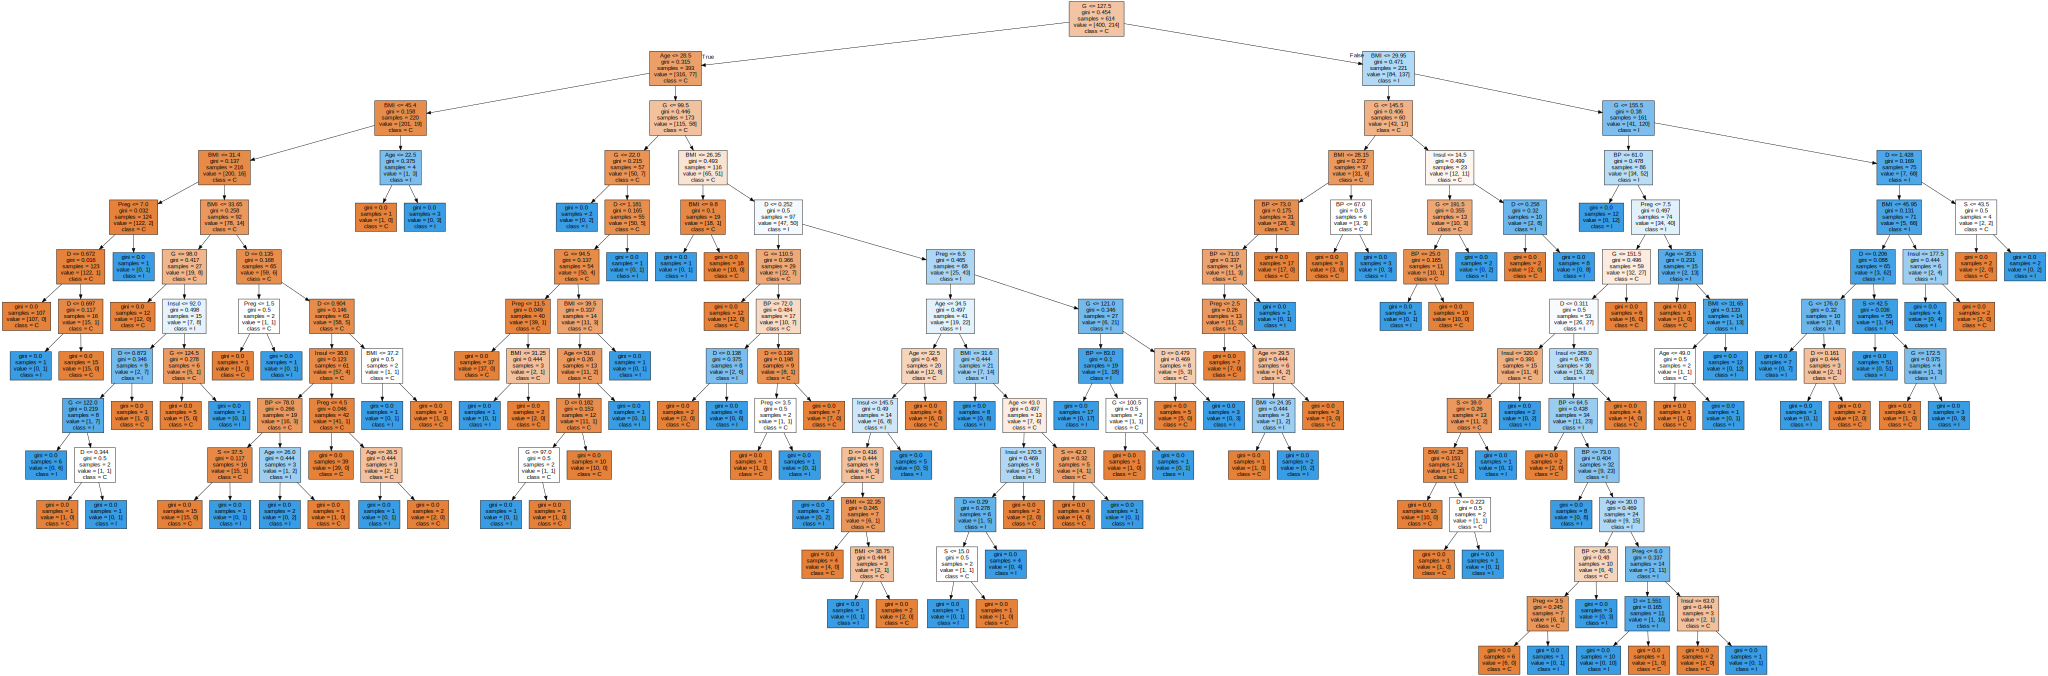

In [88]:
# min_samples_split = 2
dtc2 = DecisionTreeClassifier(random_state = 2022, min_samples_split = 2)
dtc2.fit(X_train, y_train)
export_graphviz(
    dtc2, out_file= "tree2.dot",
    feature_names = df.columns[:-1],
    class_names = df.columns[-1],
    impurity = True, filled = True
)
with open('tree2.dot') as file:
  dot_graph = file.read()
graphviz.Source(dot_graph)

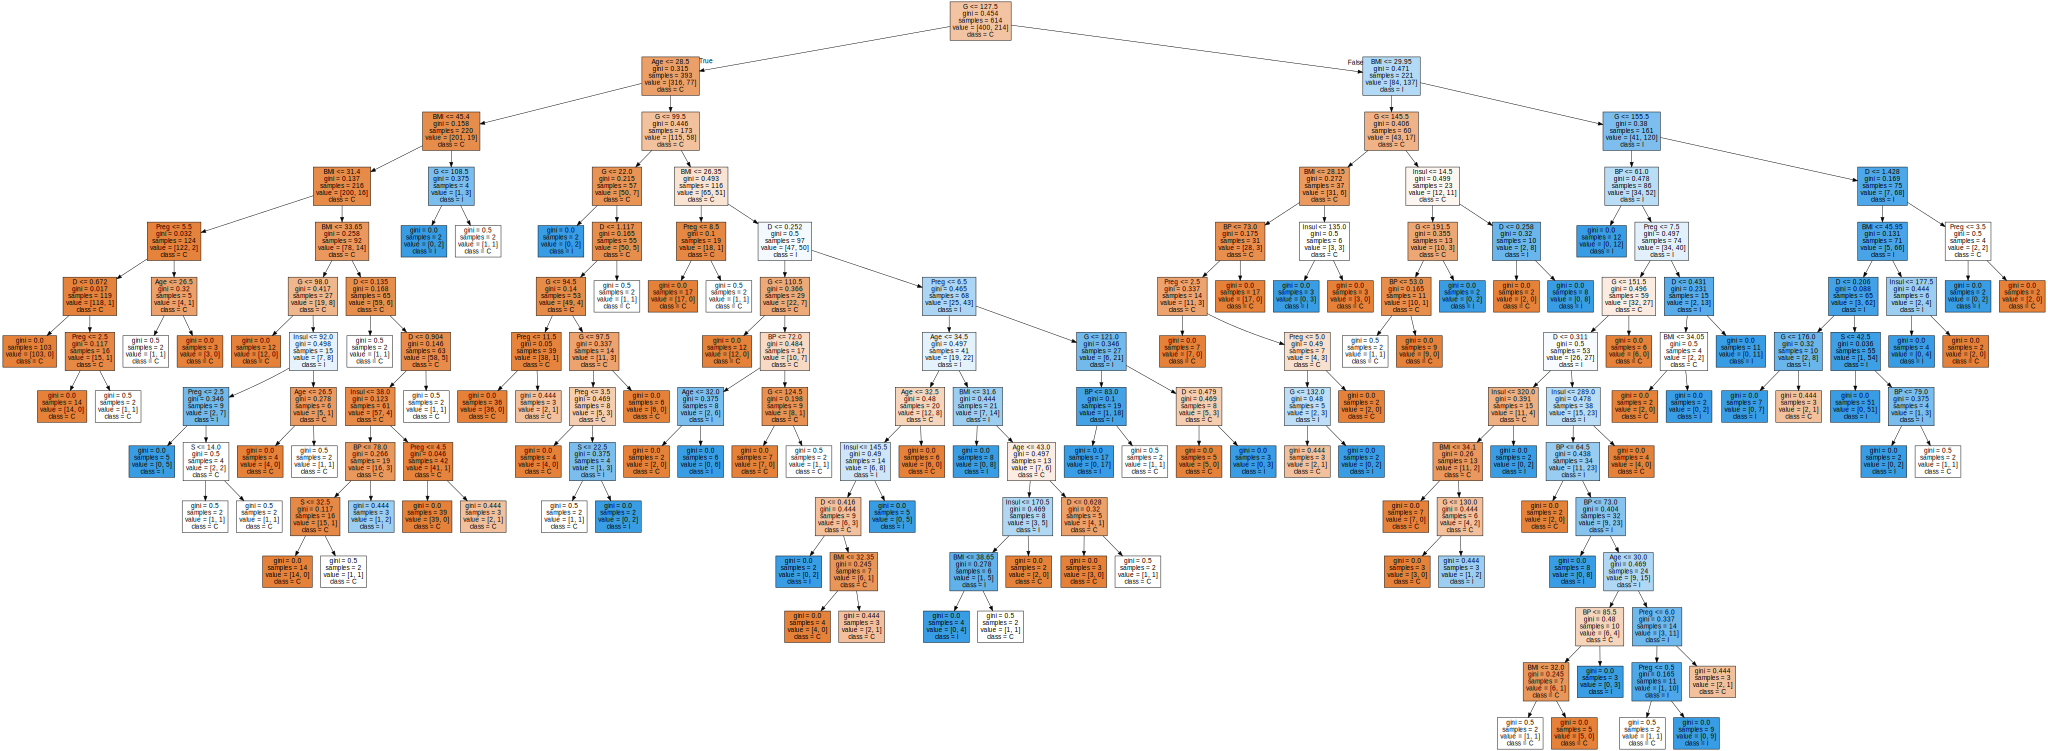

In [89]:
# min_samples_leaf = 2
dtc2 = DecisionTreeClassifier(random_state = 2022, min_samples_leaf = 2)
dtc2.fit(X_train, y_train)
export_graphviz(
    dtc2, out_file= "tree3.dot",
    feature_names = df.columns[:-1],
    class_names = df.columns[-1],
    impurity = True, filled = True
)
with open('tree3.dot') as file:
  dot_graph = file.read()
graphviz.Source(dot_graph)

## 3. 두가지 모델에 대해서 GridSearchCV를 사용하여 best가 되는 경우의 파라미터 값과 그때의 정확도를 계산하세요

In [90]:
# DecisionTreeClassifier 의 파라미터 값을 확인
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [91]:
# DecisionTreeClassifier의 best_estimator_ 구하기
# 확인할 파라미터값 설정
params = {"max_depth":[2,3,4,5,6],
          "min_samples_leaf" : [2,3,4],
          "min_samples_split" : [2,3,4]}
          #           모델 ,검증할 파라미터, 5번 교차 검증, 정확도 우선
grid_dtc = GridSearchCV(dtc, params,   cv = 5, scoring = "accuracy")
grid_dtc.fit(X_train, y_train)
print("Best parameters: ", grid_dtc.best_params_)
best_dtc = grid_dtc.estimator
best_dtc.score(X_test, y_test)

Best parameters:  {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


0.6948051948051948

In [92]:
# SVC 의 파라미터 값을 확인
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 2022,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [93]:
# DecisionTreeClassifier의 best_estimator_ 구하기

params = {"C" : [1,2,3,4,5]}
grid_svc = GridSearchCV(svc, params, cv = 5, scoring = "accuracy")
grid_svc.fit(X_train, y_train)
print("Best parameters: ", grid_svc.best_params_)
best_svc = grid_svc.estimator
best_svc.score(X_test, y_test)

Best parameters:  {'C': 2}


0.7402597402597403